<a href="https://colab.research.google.com/github/pavannayak9398/Data-Cleaning-Visualization-Analysis/blob/main/Titanic_Ship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Performing Data Cleaning and Analysis

**1. Understanding meaning of each column**

* Survived - Survived(1) and Died(0)
* Pclass - Passenger’s class (1 = 1st, 2 = 2nd, 3 = 3rd)
* Name - Passenger’s name
* Sex - Passenger’s sex
* Age - Passenger’s age
* SibSp - Number of siblings/spouses aboard
* Parch - Number of parents/children aboard (Some children travelled only with a nanny, therefore parch=0 for them.)
* Ticket - Ticket number
* Fare - Fare
* Cabin - Cabin
* Embarked - Port of embarkation: Where a vessel departs from (C = Cherbourg, Q = Queenstown, S = Southampton)

**2. Analysis which country are completely useless in predicting the survival and deleting them.**

Note - Don't just delete the columns because you are not finding it useful. Or focus is not on deleting the columns. Our focus is on analysing how each column is affecting the result or the prediction and in accordance with that deciding whether to keep the column or to delete the column or fill the null values of the column by some values and if yes, then what values.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/FSDS @Kodi Senapati/Colab files/Datasets/titanic dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Delete unnecessary columns that does not make any sense in analysis**

* PassengerId
* Name
* Ticket
* Cabin


In [ ]:
# df = data.drop('B', axis=1)
df=df.drop({'PassengerId', 'Name', 'Ticket', 'Cabin'}, axis=1 )

df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

**Know the data type of data and convert all the categorical data to Numerical data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
# Convert the Sex column to numeric by changing the type
df['Sex']=df['Sex'].replace({'male':1,'female':0})

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


<ipython-input-30-554810733823>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex']=df['Sex'].replace({'male':1,'female':0})


In [ ]:
df=df.rename(columns={'Sex':'Gender', 'SibSp':'SibSpou'})
df.head(5)

,Survived,Pclass,Gender,Age,SibSpou,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
# Using Label Encoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Embarked']=le.fit_transform(df['Embarked'])
print(df['Embarked'].head())

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSpou   891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


**Check and Fill the blank values with the mean value of the column**

In [ ]:
#find column with Null values

df.isnull().sum()

,0
Survived,0
Pclass,0
Gender,0
Age,177
SibSpou,0
Parch,0
Fare,0
Embarked,0


In [ ]:
# Now Age has Null values they must be filled. As Survived as 2 different values mean of ages should be assigned accordingly

#Mean of Survived
mean_S=df[df['Survived']==1]['Age'].mean()

#Mean of UnSurvived
mean_US=df[df['Survived']==0]['Age'].mean()

print(f'Mean Survived:{mean_S}, Mean Unsurvived:{mean_US}')

Mean Survived:28.343689655172415, Mean Unsurvived:30.62617924528302


In [ ]:
# Fill NaN values in 'Age' based on 'Survived' column
df.loc[(df['Survived']==1) & (df['Age'].isnull()), 'Age'] = mean_S
df.loc[(df['Survived']==0) & (df['Age'].isnull()), 'Age'] = mean_US

In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Gender,0
Age,0
SibSpou,0
Parch,0
Fare,0
Embarked,0


**Check if 'Embarked' column is imp for analysis or not, that is whether survival of the person depends on the Embarked column value or not.**

Perform Chi-Square Test of Independence

You can use scipy.stats.chi2_contingency to perform the Chi-Square test between the "Embarked" and "Survived" columns.

* If the p-value is less than 0.05, it means there is a statistically significant relationship between "Embarked" and "Survived" (i.e., survival might depend on the port of embarkation).
* If the p-value is greater than 0.05, it suggests there is no significant relationship between "Embarked" and survival, and "Embarked" might not be an important factor in the survival analysis.


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Embarked'], df['Survived'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print(f"P-value: {p_value}")

P-value: 1.618718800945046e-06


In [ ]:
print(df.info())
df['Age']=df['Age'].astype(int)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSpou   891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSpou   891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    flo

In [ ]:
df.to_csv('titanic_new.csv')

In [ ]:
df.shape

(891, 8)

**Task 1: Draw a pie chart for number of male and female aboard who are survived and unsurvived**

Males Survived: 109 
 Males Unsurvived: 468 
 Females Survived: 233 
Females Unsurvived: 81


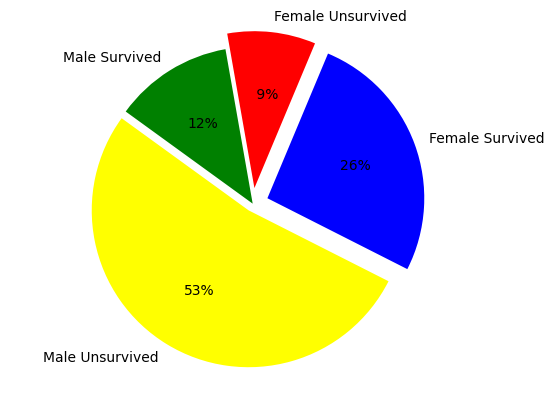

In [ ]:
# Draw a pie chart for number of male and female aboard

Male_Surv = ((df['Gender']==1) & (df['Survived']==1)).sum()
Male_UnSurv =((df['Gender']==1) & (df['Survived']==0)).sum()
Female_Surv = ((df['Gender']==0) & (df['Survived']==1)).sum()
Female_UnSurv = ((df['Gender']==0) & (df['Survived']==0)).sum()

print("Males Survived:",Male_Surv,"\n Males Unsurvived:",Male_UnSurv,"\n Females Survived:",Female_Surv,"\nFemales Unsurvived:",Female_UnSurv)

p=[Male_Surv,Male_UnSurv,Female_Surv,Female_UnSurv]
l=['Male Survived','Male Unsurvived','Female Survived','Female Unsurvived']

plt.pie(p,
        labels=l,
        colors=['green','yellow','blue','red'],
        explode=(0,0.05,0.1,0.10),
        startangle=100,
        autopct='%2.f%%')
plt.axis('equal')
plt.show()

**Task 2: Survival Analysis by multiple cases**

In [ ]:
# Check does survival analysis based on Pasenger Class

print(df.groupby('Pclass')['Survived'].sum())

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


In [ ]:
# Check does survival analysis based on Age

print(df.groupby('Age')['Survived'].sum())

Age
0     7
1     5
2     3
3     5
4     7
     ..
66    0
70    0
71    0
74    0
80    1
Name: Survived, Length: 71, dtype: int64


**Task 3: Correlation between Fare & Survival**

In [ ]:
correlation=df['Fare'].corr(df['Survived'])
print(correlation)

0.2573065223849625


**Task 4: Family Size and Survival**

In [ ]:
df['FamSize']=df['SibSpou']+df['Parch']+1

Surv=df.groupby('FamSize')['Survived'].mean()
print(Surv)

FamSize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64
